# **Phát hiện biển số**

In [1]:
import cv2
import imutils
import numpy as np

## **Tải ảnh**

In [2]:
# Param
max_size = 5000
min_size = 900

# Load image
img1 = cv2.imread('car3.jpg', cv2.IMREAD_COLOR)

#Load image (ảnh không có biển số)
img0 = cv2.imread('car0.jpg', cv2.IMREAD_COLOR)

# Điều chỉnh tham số kích thước ảnh
img1 = cv2.resize(img1, (620, 480))
img0 = cv2.resize(img0, (620, 480))

## **Phát hiện cạnh**

In [3]:
# Chuyển ảnh sang màu xám
gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  

In [4]:
# Làm mờ ảnh, giảm nhiễu
gray0 = cv2.bilateralFilter(gray0, 11, 17, 17)
gray1 = cv2.bilateralFilter(gray1, 11, 17, 17)

In [5]:
# Phát hiện cạnh trong ảnh 
edged0 = cv2.Canny(gray0, 30, 200)
edged1 = cv2.Canny(gray1, 30, 200)

 

* Tìm đường viền trong hình ảnh có viền, chỉ giữ lại đường viền lớn nhất;
* Khởi tạo đường viền màn hình.


In [6]:
# ảnh 0
cnts0 = cv2.findContours(edged0.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts0 = imutils.grab_contours(cnts0)
cnts0 = sorted(cnts0, key=cv2.contourArea, reverse=True)
screenCnt0 = None

# ảnh 1
cnts1 = cv2.findContours(edged1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts1 = imutils.grab_contours(cnts1)
cnts1 = sorted(cnts1, key=cv2.contourArea, reverse=True)
screenCnt1 = None

In [7]:
# vòng lặp qua các đường viền (contours)

for c in cnts0:
    peri0 = cv2.arcLength(c, True)
    approx0 = cv2.approxPolyDP(c, 0.05 * peri0, True)
    # nếu đường bao gần đúng của chúng ta có bốn điểm,
    # thì chúng ta có thể giả định rằng chúng ta đã tìm thấy màn hình.
    if len(approx0) == 4 and max_size > cv2.contourArea(c) > min_size:
        screenCnt0 = approx0
        break

for c in cnts1:
    peri1 = cv2.arcLength(c, True)
    approx1 = cv2.approxPolyDP(c, 0.05 * peri1, True)
    # nếu đường bao gần đúng của chúng ta có bốn điểm,
    # thì chúng ta có thể giả định rằng chúng ta đã tìm thấy màn hình.
    if len(approx1) == 4 and max_size > cv2.contourArea(c) > min_size:
        screenCnt1 = approx1
        break

In [8]:
# Kiểm tra detected
def check_detected(screenCnt):
  if screenCnt is None:
      return 0
  else:
      return 1

In [9]:
detected0 = check_detected(screenCnt0)
detected1 = check_detected(screenCnt1)

## **Cắt ảnh**

No plate detected!!! 



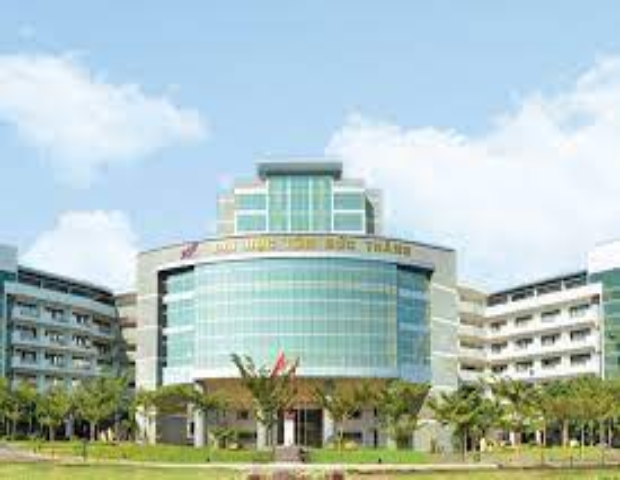

In [10]:
# ảnh 0
if detected0 == 1:
      cv2.drawContours(img0, [screenCnt0], -1, (0, 255, 0), 3)

      # Masking the part other than the number plate
      mask = np.zeros(gray0.shape, np.uint8)
      new_image = cv2.drawContours(mask, [screenCnt0], 0, 255, -1, )
      new_image = cv2.bitwise_and(img0, img0, mask=mask)

      # Now crop
      (x, y) = np.where(mask == 255)
      (topx, topy) = (np.min(x), np.min(y))
      (bottomx, bottomy) = (np.max(x), np.max(y))
      Cropped0 = gray0[topx:bottomx + 1, topy:bottomy + 1]

      # Display image
      print('Input image:')
      from google.colab.patches import cv2_imshow
      cv2_imshow(img0)
      print('\n License plate')
      cv2_imshow(Cropped0)
      cv2.imwrite('cropped0.jpg', Cropped0)

      cv2.waitKey(0)
      cv2.destroyAllWindows()
else:
      # Display image
      print('No plate detected!!! \n')
      from google.colab.patches import cv2_imshow
      cv2_imshow(img0)

Input image: 



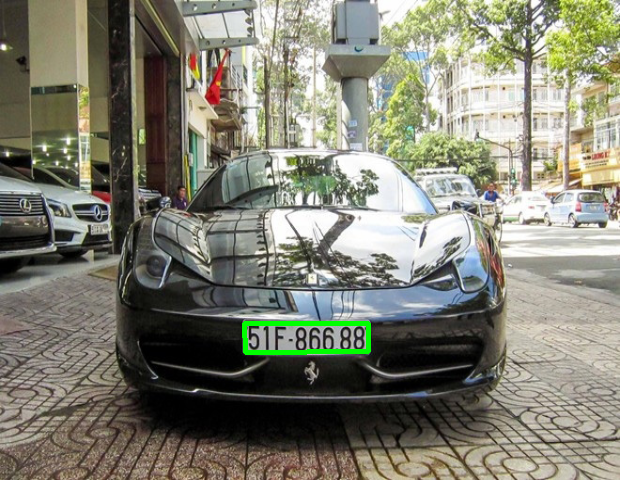


 License plate: 



In [11]:
# ảnh 1
if detected1 == 1:
      cv2.drawContours(img1, [screenCnt1], -1, (0, 255, 0), 3)

      # Masking the part other than the number plate
      mask = np.zeros(gray1.shape, np.uint8)
      new_image = cv2.drawContours(mask, [screenCnt1], 0, 255, -1, )
      new_image = cv2.bitwise_and(img1, img1, mask = mask)

      # Now crop
      (x, y) = np.where(mask == 255)
      (topx, topy) = (np.min(x), np.min(y))
      (bottomx, bottomy) = (np.max(x), np.max(y))
      Cropped1 = gray1[topx:bottomx + 1, topy:bottomy + 1]

      # Display image
      print('Input image: \n')
      from google.colab.patches import cv2_imshow
      cv2_imshow(img1)
      print('\n License plate: \n')
      cv2_imshow(Cropped1)
      cv2.imwrite('cropped1.jpg', Cropped1)

      cv2.waitKey(0)
      cv2.destroyAllWindows()
else:
      # Display image
      print('\n No plate detected!!!')
      from google.colab.patches import cv2_imshow
      cv2_imshow(img1)

# **Nhận diện biển số xe**

In [12]:
import matplotlib.pyplot as plt

## **Nhận diện ký tự**

In [13]:
import numpy as np
import cv2

# Khớp các đường viền với biển số hoặc mẫu ký tự
def find_contours(dimensions, img):

    # Tìm tất cả các đường viền trong hình ảnh
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Truy xuất các thứ nguyên tiềm năng
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Kiểm tra 5 hoặc 15 đường viền lớn nhất cho biển số hoặc ký tự tương ứng
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # phát hiện đường bao trong hình ảnh nhị phân và trả về tọa độ của hình chữ nhật bao quanh nó
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        # kiểm tra kích thước của đường viền để lọc ra các ký tự theo kích thước của đường viền
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) # lưu trữ tọa độ x của đường viền của ký tự, để sử dụng sau này để lập chỉ mục các đường bao

            char_copy = np.zeros((44,24))
            # trích xuất từng ký tự bằng cách sử dụng tọa độ của hình chữ nhật bao quanh
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')

            char = cv2.subtract(255, char)

            # Thay đổi kích thước hình ảnh thành 24x44 với viền đen
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # Danh sách lưu trữ hình ảnh nhị phân của nhân vật (không được sắp xếp)
            
    # Trả về các ký tự theo thứ tự tăng dần đối với tọa độ x (ký tự ngoài cùng bên trái trước)
            
    plt.show()
    # chức năng tùy ý lưu trữ danh sách các chỉ số ký tự đã được sắp xếp
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx]) # lưu trữ hình ảnh nhân vật theo chỉ mục của chúng
    img_res = np.array(img_res_copy)

    return img_res

## **Tìm các ký tự trong hình ảnh kết quả**

In [14]:
def segment_characters(image) :

    # Tiền xử lý hình ảnh biển số xe đã cắt
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Làm cho đường viền trở thành màu trắng
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Ước tính kích thước đường nét ký tự của biển số xe bị cắt
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Nhận đường viền trong biển số xe đã cắt
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

## **Khoanh vùng ký tự**

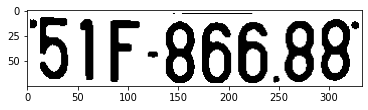

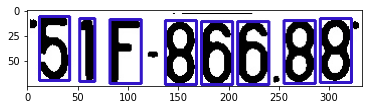

In [15]:
img = cv2.imread('cropped1.jpg')
char = segment_characters(img)

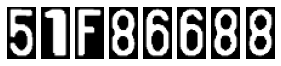

In [16]:
for i in range(8):
    plt.subplot(1, 10, i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

## **Xây dựng mô hình cho các ký tự**

In [20]:
import tensorflow as tf
tf.executing_eagerly()

True

In [20]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/data/data/train',  # thư mục đích
        target_size=(28,28),  # tất cả hình ảnh sẽ được thay đổi kích thước thành 28x28
        batch_size=1,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/data/data/val',  # thư mục đích
        target_size=(28,28),  # tất cả hình ảnh sẽ được thay đổi kích thước thành 28x28 batch_size = 1
        class_mode='categorical')

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras import optimizers

In [ ]:
model = Sequential()
model.add(Conv2D(32, (24,24), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('acc') is not None and logs.get('acc') >= DESIRED_ACCURACY) :
            self.model.stop_training = True

In [ ]:
import datetime
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
batch_size = 1
callbacks = [tensorboard_callback, myCallback()]
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 100, callbacks=callbacks)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


864/864 [==============================] - 8s 8ms/step - loss: 3.5322 - accuracy: 0.0660 - val_loss: 3.3970 - val_accuracy: 0.1898
Epoch 2/100
864/864 [==============================] - 5s 5ms/step - loss: 3.2228 - accuracy: 0.1887
Epoch 3/100
864/864 [==============================] - 4s 5ms/step - loss: 2.6930 - accuracy: 0.3345
Epoch 4/100
864/864 [==============================] - 5s 6ms/step - loss: 2.1859 - accuracy: 0.4259
Epoch 5/100
864/864 [==============================] - 4s 5ms/step - loss: 1.7825 - accuracy: 0.5174
Epoch 6/100
864/864 [==============================] - 5s 5ms/step - loss: 1.5037 - accuracy: 0.5972
Epoch 7/100
864/864 [==============================] - 5s 5ms/step - loss: 1.2567 - accuracy: 0.6377
Epoch 8/100
864/864 [==============================] - 5s 5ms/step - loss: 1.1211 - accuracy: 0.7002
Epoch 9/100
864/864 [==============================] - 5s 5ms/step - loss: 1.0742 - accuracy: 0.7014
Epoch 10/100
864/864 [==============================] - 4s 5m

## **Nhận dạng các ký tự trong biển số xe**

In [17]:
import keras
model = keras.models.load_model('model_retrain.h5')

In [18]:
def fix_dimension(img): 
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img
  
def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char): # lặp lại các ký tự
        img_ = cv2.resize(ch, (28,28))
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) # chuẩn bị hình ảnh cho mô hình
        y_ = np.argmax(model.predict(img), axis=-1)[0]
        character = dic[y_]
        output.append(character) # lưu trữ kết quả trong một danh sách
        
    plate_number = ''.join(str(v) for v in output)
    
    return plate_number

print(show_results())

51F86688


In [20]:
# plt.figure(figsize=(10,6))
# for i,ch in enumerate(char):
#     img = cv2.resize(ch, (28,28))
#     plt.subplot(3,4,i+1)
#     plt.imshow(img,cmap='gray')
#     plt.title(f'predicted: {show_results()[i]}')
#     plt.axis('off')
# plt.show()